<a href="https://colab.research.google.com/github/scaleracademy/edge-webdev-2021/blob/main/probabilty_theory_foundation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True) 

Mounted at /content/drive


# UTILITY FUNCTIONS:

In [ ]:
data_path = 'drive/My Drive/2_SCALER/'

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
from collections import Counter
from sklearn.model_selection import ParameterGrid

plt.style.use('seaborn-whitegrid')

In [ ]:
def fn_load_img(img_path, figsize = (12, 7)):
    plt.figure(figsize = figsize)
    plt.imshow(img.imread(img_path))
    plt.axis('off')

In [ ]:
def fn_permutations(dictO_lists_to_permute):
    permutations = [*ParameterGrid(dictO_lists_to_permute)]
    return pd.DataFrame(permutations)

In [ ]:
def fn_dictO_proba_dist_continuous(continuous_vals, n_bins = 10):
    start, stop = min(continuous_vals), max(continuous_vals)
    bins = np.linspace(start, stop, n_bins).round(2)
    s = pd.Series(continuous_vals)
    z = df.age.groupby(pd.cut(s, bins=bins)).count()
    z = dict(z/z.sum())
    k = [str(i) for i in z.keys()]
    v = np.array([i for i in z.values()]).round(2)
    return {k: v for k, v in zip(k, v)}

In [ ]:
def fn_visualize_discrete_dist(dictO_proba_dist, alpha = 0.6, 
                               width = 4):    
    d = dictO_proba_dist
    kw = dict(alpha = alpha)
    plt.figure(figsize = (width, 4))
    plt.bar(d.keys(), d.values(), **kw)
    plt.xticks(size = 13, rotation = 90)
    plt.ylabel('PROBABILITY', fontsize=13)

In [ ]:
def fn_box(lower_vertex, upper_vertex, color = 'black', hide_axis = False):

    lower_x, lower_y = lower_vertex
    upper_x, upper_y = upper_vertex

    plt.plot([lower_x, upper_x], [lower_y, lower_y], color = color)
    plt.plot([lower_x, lower_x], [lower_y, upper_y], color = color)
    plt.plot([upper_x, upper_x], [lower_y, upper_y], color = color)
    plt.plot([lower_x, upper_x], [upper_y, upper_y], color = color)

    plt.xlabel('X', fontsize = 18)
    plt.ylabel('Y', fontsize = 18)

    plt.axis('equal')
    if hide_axis:
       plt.axis('off')

In [ ]:
def fn_venn_mutually_exclusive():
    intersection = 0 
    z = venn2(subsets = (15, 5, intersection), set_labels = ('A', 'B'))
    z.subset_labels[0].set_visible(False)
    z.subset_labels[1].set_visible(False)
    venn2_circles(subsets = (15, 5, intersection))
    title = """P(A or B) = P(A) + P(B)"""
    plt.title(title)

In [ ]:
def fn_venn_mutually_non_exclusive(show_counts = False):
    intersection = 2
    z = venn2(subsets = (15, 5, intersection), set_labels = ('A', 'B'))
    if not show_counts:
        z.subset_labels[0].set_visible(False)
        z.subset_labels[1].set_visible(False)
        z.subset_labels[-1].set_visible(False)
    venn2_circles(subsets = (15, 5, intersection))
    title = """P(A or B) = P(A) + P(B) - P(A ∩ B)"""
    plt.title(title)

In [ ]:
def fn_venn_A_B(S, only_A, only_B, AB):
    subsets = (only_A, only_B, AB)
    venn2(subsets = subsets, set_labels = ('A', 'B'))
    venn2_circles(subsets = subsets)
    plt.title(f'\nSample space S: {S}')


In [ ]:
def fn_venn_A_B_disjoint():
    S, only_A, only_B, AB = 50, 7, 7, 0
    subsets = (only_A, only_B, AB)
    venn2(subsets = subsets, set_labels = ('A', 'B'))
    venn2_circles(subsets = subsets)
    plt.title(f'\nSample space S: {S}')


In [ ]:
def fn_venn_A_B_non_disjoint():
    S, only_A, only_B, AB = 50, 7, 4, 2
    subsets = (only_A, only_B, AB)
    venn2(subsets = subsets, set_labels = ('A', 'B'))
    venn2_circles(subsets = subsets)
    plt.title(f'\nSample space S: {S}')


In [ ]:
def fn_venn_independence():
    S, only_A, only_B, AB = 60, 20, 10, 20
    subsets = (only_A, only_B, AB)
    venn2(subsets = subsets, set_labels = ('A', 'B'))
    venn2_circles(subsets = subsets)
    plt.title(f'\nSample space S: {S}')


In [ ]:
def fn_venn_conditional_independence(show_counts = False):
    intersection = 2
    z = venn2(subsets = (15, 10, intersection), set_labels = ('A', 'B'))
    if not show_counts:
        z.subset_labels[0].set_visible(False)
        z.subset_labels[1].set_visible(False)
        z.subset_labels[-1].set_visible(False)
    venn2_circles(subsets = (15, 10, intersection))

    plt.axhline(y=0.3, xmin=0, xmax=1, linewidth=2.25, linestyle = '--', c = 'k')
    plt.text(-0.8, 0.32, 'C', fontsize = 16)
    plt.text(-0.33, 0.32, '2', fontsize = 12)
    plt.text(-0.33, 0.0, '20', fontsize = 12)
    plt.text(0.35, 0.32, '2', fontsize = 12)
    plt.text(0.35, 0.0, '10', fontsize = 12)
    plt.text(0.04, 0.0, '20', fontsize = 12)

    title = 'S = 60'
    plt.title(title)

In [ ]:
def fn_venn_law_total_proba(show_counts = False):
    intersection = 0
    z = venn2(subsets = (15, 0, intersection), set_labels = ('', ''))
              
    if not show_counts:
        z.subset_labels[0].set_visible(False)
        z.subset_labels[1].set_visible(False)
    venn2_circles(subsets = (15, 0, intersection))

    plt.axhline(y=0.0, xmin=0, xmax=1, linewidth=2.25, linestyle = '-', c = 'k')
    plt.axvline(x=0.2, ymin=0, ymax=1, linewidth=2.25, linestyle = '-', c = 'k')
    plt.text(-0.6, 0.4, 'A1', fontsize = 13)
    plt.text(0.7, 0.4, 'A2', fontsize = 13)
    plt.text(-0.6, -0.55, 'A3', fontsize = 13)
    plt.text(0.7, -0.55, 'A4', fontsize = 13)
    plt.text(0.0, 0.25, 'B', fontsize = 13)

    title = 'S'
    plt.title(title, fontsize = 16)

In [ ]:
def fn_venn_bayes(show_counts = False):
    intersection = 0
    z = venn2(subsets = (15, 0, intersection), set_labels = ('', ''),
              set_colors = ('blue', 'purple'))
    if not show_counts:
        z.subset_labels[0].set_visible(False)
        z.subset_labels[1].set_visible(False)
    venn2_circles(subsets = (15, 0, intersection))
    plt.axvline(x=-0.06, ymin=0, ymax=1, linewidth=2.25, linestyle = '-', c = 'k')
    plt.text(-0.8, -0.6, 'bag_1', fontsize = 13)
    plt.text(0.8, -0.6, 'bag_2', fontsize = 13)
    plt.text(0.1, 0.25, 'blue', fontsize = 13)
    title1 = 'S = {bag_1, bag_2} or {red, blue}\n'
    plt.title(title1, fontsize = 16)

In [ ]:
def fn_joint_combinations():
    dictO_lists_to_permute = {'prime': ['yes', 'no'],
                            'div_2_3': ['div_both', 'not_div_both', 'div_3', 'div_2']}

    permutations = [*ParameterGrid(dictO_lists_to_permute)]
    return pd.DataFrame(permutations)

# 1. SECTION 1 (INTRO): 10 mins

##WHAT IS PROBABILTY THEORY ABOUT?

To explore this question, we will first have to look at __PROCESSES__.  
A process can be loosely defined as:    
- "An action or a series of actions taken, that result in some kind of __OUTCOME__."  

Processes can be categorized into two kinds, based on their outcomes when subjected to **REPITITION**.  
       
They are:
1. Deterministic processes.  
2. Stochastic or Random processes.


##WHAT ARE DETERMINISTIC PROCESSES?
These are processes that yield the same outcome irrespective of the number of times they are repeated.  
For example:    
The chemical processes of combining 2 atoms of hydrogen with one atom of oxygen will always result in the production of water (H20). 

&nbsp; 




## WHAT ARE STOCHASTIC PROCESSES:  
These are processes that can yield different outcomes each time they are repeated.  

ie: Their outcomes cannot be deterministically predicted.  

For example:   
Consider the process of flipping a coin and noting which side is up.  
The outcome for any particular repitition cannot be deterministically predicted.   

Even though only 2 outcomes are possible (ie: either head or tails),    
one cannot be completely sure what the outcome of any particular coin toss will be.    

There is an element of RANDOMNESS inherent to the process, which produces an UNCERTANITY about the outcome.

&nbsp;

PROBABILITY THEORY is the study of stochastic processes.   
It is a framework that helps us quantify the uncertainities in stochastic processes.

# SECTION 2: 45 mins

##  WHAT IS PROBABILITY?
Consider the stochastic process of blindly picking a ball from a bag containing 2 red balls and 1 blue ball.  
What are the __chances__ of a red ball?  
What are the __chances__ of a green ball?

&nbsp; 

The number of red balls in the bag is greater than the number of blue balls.
Hence, the __chances__ of picking a red ball is larger.

The propotions of the red and blue balls in the bag affects the __chances__ of each of the outcomes.   

We can intuitively say that the __chances__ of picking the red ball is two times more than that of picking the blue ball.

&nbsp; 

## So how can we define probabilty?
A simple way to define it would be: 
- __"It is a measure that quantifies the chances of occurence of an EVENT.__" 

Let us unpack this definition.   
Within this statement are the following implications:
- Repitition
- Outcome of interest
- Sample space

Let us explore what they mean using the bag of balls example.  
Imagine that we want to determine the probability of the red ball __without inspecting__ the contents of the bag.  
&nbsp;


   













## To do this we conduct the following __EXPERIMENT__:
- We repeat the process of blindly drawing a ball from the bag for a __suitable number__ of repititions.
- Each repitition is identical. 
    - ie: We replace the ball back into the bag after each repitition.
- A record of the outcomes of each repitition is maintained.  
&nbsp;

Once the chosen number of repititions are performed we inspect our record.    
We determine the number of times the red ball was drawn.

&nbsp;

The probability of the red ball is defined to be:     
P(red) = number of times the red ball occurred / number of repititions of the experiment.  

ie: P(outcome of interest) = number of occurances of that outcome / number of repititions of the experiment.     
ie: P(event) = number of occurances of the event/ number of repititions of the experiment.

&nbsp;

ie:  
 __Given the collection of outcomes of a repeated experiment,    
the probabilty of an event,   
is the fraction of those outcomes that are events.__

&nbsp;

Note that since probability of an event is a fraction: 
- The maximum value possible is 1.   
ie: n_events = n_repititions
- The minimum values possible is 0.   
ie: n_events = 0




      

## So what is an EXPERIMENT ?
An experiment is basically a stochastic process that is being studied.



&nbsp;

## What is an EVENT?
In the most basic sense an __EVENT__ is an outcome or a set of outcomes of interest.    

It could be defined as:  

"__An outcome that satifies some condition specified by the one conducting the experiment__" 

We shall explore this definition in some more depth a little later.


&nbsp;


## What is a SAMPLE SPACE?
The sample space is the __SET__ of all possible outcomes of an experment.
It is denoted by "S" or "Ω".  
For example:
- The sample space of the bag of balls experiment would be S = {red, blue}
- The sample space for a 6 faced dice roll experiment would be S = {1 ,2, 3, 4, 5, 6}


&nbsp;

## The sample space S, is a __SET__. What is a set?
In the simplest sense, a set is a collection of unique items.  
ie: It is a group of items without any dupicates.  
It is represented by a capital letter.  
We distinguish a set from other types of groupings by enclosing the elements of the set with Curly brackets.    
Ex: S = {red, blue}  or S = {1 ,2, 3, 4, 5, 6}



&nbsp;


## What is the logic behind the previous experiment?

The __calculation of probability__ in this experiment is based on the following logic:
- If a stochastic process has been repeated a __"suitable"__ number of times.
- Then the approximate chances of an event ocurring can be represented by:
    - The proportion of the outcomes that are __events__.

- Here the word "suitable" has importance:
    - A repitition size of 5 would be inadequate.
    - The larger the number of repititions, the more accurate the probability measurement will be. 

## So, what would be considered a "suitable" number of repititions?

Lets us explore this question using a simple simulation of the bag of balls experiment.   
The code shown below:
1. Simulates the bag of ball experiment 
2. Allows us to compare P(red_ball) computed at various repitition sizes.

In [ ]:
S = ['R', 'R', 'B'] # Assume that we do not know the proportions
for i in  [5, 10, 25, 50, 100, 1000, 10_000, 50_000]:          
    outcomes =  [np.random.choice(S) for j in range(i)]
    n_events = len([i for i in outcomes if i == 'R'])
    print(f'n_events/n_repititions  = {n_events}/{i} = {n_events / i}')

n_events/n_repititions  = 5/5 = 1.0
n_events/n_repititions  = 5/10 = 0.5
n_events/n_repititions  = 16/25 = 0.64
n_events/n_repititions  = 30/50 = 0.6
n_events/n_repititions  = 65/100 = 0.65
n_events/n_repititions  = 688/1000 = 0.688
n_events/n_repititions  = 6658/10000 = 0.6658
n_events/n_repititions  = 33398/50000 = 0.66796


From the values seen above, we could __generalize__ that: 
- As the number of repititions are increased.. 
- The computed value of P(red_ball) gets closer & closer to..
- The actual proportion of the red balls in the bag. ie: 2/3 = 0.6667







The method of computation followed in the experiment above is called:
- The FREQUENTIST approach for computing probabilities.   

The frequentist approach basis its probabilty calculations on:  
- The __frequency__ of occurance of an event, given a suitable number of repititions of the experiment.  
  
The generalization made earlier is in essence, the Frequentist paradigm.  
As per this paradigm:
- The emphirical probability will tend towards the theoretical probabilty as the number of repititions of the experiment tends to infinity.  
&nbsp;

## WHAT ARE EMPHIRICAL & THEORETICAL PROBABILITIES?
1. The probability computed by repeating an experiment multiple times is called EMPIRICAL PROBABILITY.
2. The probabilty calculated by using prior knowledge of the __PROBABILITY DISTRIBUTION__ of the  sample space, is called THEORETICAL PROBABILTY.


In the previous defination for theoretical probability we used the term PROBABILITY DISTRIBUTION..

## WHAT ARE PROBABILTY DISTRIBUTIONS?

In the bag of balls experiment just conducted, we know that:
- There are red balls and blue balls.
    - This represents the sample space. ie S = {red, blue}
- We also know that there are 2 red balls and 1 blue ball.
    - This means that as the number of repititions of the experiment tends to infinity, the number of the red and blue balls that occur will reflect this proportion.    

ie: The proportion red & blue balls  will be: {'red': 2/3, 'blue': 1/3}    
ie: The total probabilty of the sample space (ie: 1) is distributed among the red & blue balls as shown: {'red': 2/3, 'blue': 1/3}

&nbsp;

The __Probability Distributions__ of a sample space or experiment is   
basically an overview of    
how the probabilty of occurance is distributed within the sample space.  

For example consider the sample space of a six sided dice roll:    
Distr_dice:  {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}  
ie: All outcomes in the sample space are equally likely or probable.

&nbsp;



Probabilty distributions is a much wider topic. 
It will be discussed in more detail in future lectures.  
For now, it suffices for us to just have this fundamental understanding of what they are.

## Let us summarize what we have understood so far:
 - Deterministic & Stochastic processes.
 - Experiment, sample space, outcome, event.
 - Sets.
 - Theoretical & Empirical Probabilties.
 - Frequentist paradigm.
 - Probabilty distributions.

# SECTION 3: 30 mins

## Let us now explore what events are in some more detail:

Previously we defined an event as:  
- __Given an experiment, an event is an outcome that satifies some condition specified by the one conducting the experiment__.  
&nbsp;

Let us explore this definition further.  

Consider a slightly more complex version of the "bag of balls" experiment.   
Say that the bag  contains 50 balls uniquely labelled 1 to 50.

We randomly pick one ball from the bag.     
What would be the sample space of this experiment?  

- The sample space of this experiment would be the set of all possible outcomes.
- Thus the sample space will be the set:
- S = {1,2,3..50}







  

## Some examples of event conditions given the above sample space would be:
An outcome is considered as an event if it satifies the condition that:
1. The outcome number is even and less than 15. 
2. The outcome number is odd and less than 15. 

Lets denote the event set resulting from
- The 1st condition as set A.  
- The 2nd condition as set B.    

Then:
    

In [ ]:
S = set(range(1, 51))
A = {i for i in S if i%2 == 0 and i < 15}
B = {i for i in S if i%2 != 0 and i < 15}

In [ ]:
A, len(A)

({2, 4, 6, 8, 10, 12, 14}, 7)

In [ ]:
B, len(B)

({1, 3, 5, 7, 9, 11, 13}, 7)

Thus probabilities of events from sets A & B are:

In [ ]:
P_A = len(A)/len(S)
P_B = len(B)/len(S)

P_A, P_B

(0.14, 0.14)

Notice that event sets A & B:
- Are __SUBSETS__ of S. ie: S completely contains sets A & B
- Do not share any common elements between them.   
    - Such sets are called __DISJOINT SETS__ or __MUTUALLY EXCLUSIVE SETS__



## WHAT DO DISJOINT EVENTS SETS IMPLY?
They imply that, given any particular repitition of the experiment,    
the outcome will exclusively belong to only one event set.   

So for the experiment just described, the outcomes can  either be A or B, not both.

Sets and their subsets are best visualized using  __VENN DIAGRAMS__ as shown below: 

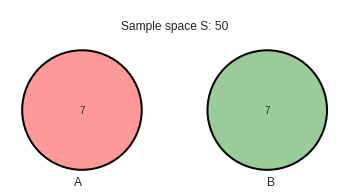

In [ ]:
fn_venn_A_B_disjoint()

In the venn diagram above:
- The sample space S, is represented by the space inside the white rectangle. 
- The spaces inside red and green circles represent event sets A & B.
- The fact that there is no overlap between the circles representing A & B means that A & B are disjoint.

## Let us further explore events/event conditions:
Consider the same example as above, but with 2 new event conditions.  

An outcome is considered as an event if it satisfies the condition that::  
1. It is divisible by 2 and lesser than 15.
2. It is divisible by 3 and lesser than 15.

Lets denote the event set resulting from the 1st condition as set A.  
Lets denote the event set resulting from the 2nd condition as set B.  
Thus:

In [ ]:
S = set(range(1, 51))
A = {i for i in S if i%2 == 0 and i < 15}
B = {i for i in S if i%3 == 0 and i < 15}

In [ ]:
A, len(A)

({2, 4, 6, 8, 10, 12, 14}, 7)

In [ ]:
B, len(B)

({3, 6, 9, 12}, 4)

In [ ]:
P_A = len(A)/len(S)
P_B = len(B)/len(S)

P_A, P_B

(0.14, 0.08)

Notice that sets A and B have common elements between them.  
This is because there are numbers that are divisible by both 2 and 3.  
The elements common to both sets are:


In [ ]:
A & B    # ------ "&" is python's set intersection operator

{6, 12}

Values/items common to 2 or more sets are called INTERSECTIONS.       
The intersection of sets A and B is denoted as A ∩ B.    
Thus:
- A ∩ B = {6, 12, 18}      


Note that: __A∩B and B∩A have the same meaning__





Sets having intersections are called NON DISJOINT or NON MUTUALLY BEXCLUSIVE sets.

## Let us summarize what we have understood so far:

- Event conditions.
- Subsets.
- Intersection of sets.
- Disjoint & Non disjoint sets.
- Event conditions decide whether sets can be disjoint or not.

# SECTION 4: 45 mins



## WHAT DO NON DISJOINT SETS IMPLY?
They imply that, given any particular repitition of the experiment, the outcome:
- Could exclusively belong to only one event set  
- Could belong to multiple sets.

They also imply the existence of __CONDITIONAL PROBABILITIES__.





## WHAT ARE CONDITIONAL PROBABILITIES?
Let us explore what conditional probabilities are with reference to the Venn diagram of this experiment.

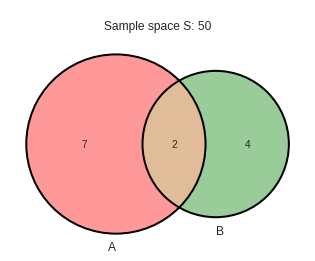

In [ ]:
fn_venn_A_B_non_disjoint()

The yellow region of overlap between the 2 circles representing sets A & B indicates that :
- Event sets A & B have common elements. ie: A ∩ B exists.
- The common elements {6, 12, 18} are contained within this yellow region/space.

Now imagine that we have drawn a ball from the bag.
- Lets say it turns out to belong to set A (ie: divisible by 2)
- What is the probability that this ball belongs to set B also? (ie: divisible by 3 also)

In other words:
- What is the probability that a ball belongs to set B given the condition that it belongs to set A?
- Or in simpler terms: What is the probability of B given A. 
- Or what is P(B|A) - - - - (set notation for conditional probabilty). 

&nbsp;


In the example above we can easily compute this by:
- Finding out what proportion of set A does A ∩ B occupy.
- ie: Assuming A as the sample space and then finding out P(B)


Thus:
- P(B|A) = len(A∩B) / len(A)   

Note that his nothing but : P(A∩B) / P(A)   
Because: 
- P(A∩B) = len(A∩B) / len(S)
- P(A) = len(A) / len(S)

&nbsp;


- Hence: P(B|A) = P(A∩B) / P(A)
- Similarly: P(A|B) = P(A∩B) / P(B)




In [ ]:
P_B_given_A = len(A & B)/len(A)
P_A_given_B = len(A & B)/len(B)

P_B_given_A, P_A_given_B

(0.2857142857142857, 0.5)

## WHAT IS THE PROBABILITY OF A ∩ B? (THE MULTIPLICATION RULE)
The probability of A∩B can be got by rearranging the expression for conditional probability as shown below:

P(A∩B) = P(A)P(B|A)  = P(B)P(A|B)

This expression is called the MULTIPLICATION RULE.   
It is used to determine intersectional probabilities, given the actual and conditional probabilities of the sets in question.









## WHAT IF P(B|A) = P(B)?
This means that P(B) is unaffected by the occurance of event A.  
ie: P(B) remains the same given  event A.  
In such case we say event B is INDEPENDENT of event A.




## LET US EXPLORE INDEPENDENCE WRT DISJOINT & NON DISJOINT SETS:
Consider the disjoint sets A & B shown below.

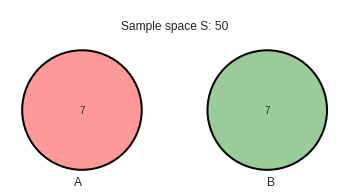

In [ ]:
fn_venn_A_B_disjoint()

P(B) = 7/50   
But P(B|A) = 0.  
Hence B is not independent given A.  

Now, consider the non disjoint sets given below.

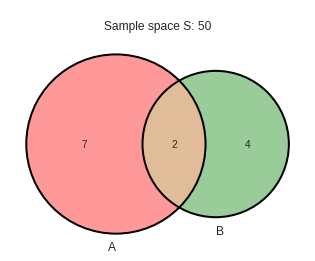

In [ ]:
fn_venn_A_B_non_disjoint()

P(B) = 6/50,   
But P(B|A) = 2/7

Hence B is not independent given A.

## Can P(B|A) be = P(B)?
Yes this can occur in case of __PARALLEL EXPERIMENTS__ .  
ie: An experiment where 2 or more sub experiments are conducted independent of each other.

Consider another version of the bag of balls experiment.   
Instead of just one bag we have 2 bags with balls 1 to 50 each.  

Lets say we draw a ball from bag 1 and it turns out to belong to set A (sub experiment 1).  
Does this affect the probability of drawing a ball belonging to set B from bag 2 ? (sub experiment 2) 

The answer is no. Sub experiments 1 and 2 are completely independent of each other.

ie: 
- P(B2|A1) = P(B2)  
- P(A2|B1) = P(A2)   

We will explore Parallel experiments  in some more depth further along the lecture.

CAN SIMPLE (NON PARALLEL) EXPERIMENTS HAVE INDEPENDENT EVENTS?  

Yes this can occur among non disjoint sets if:
 - len(A∩B) = (len(A) * len(B)) / len(S)

Consider the venn diagram of the non disjoint sets A and B as shown below:


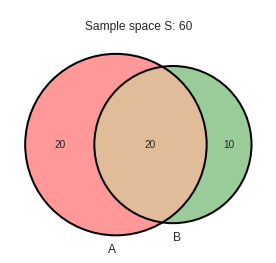

In [ ]:
fn_venn_independence()

P(B) = 30/60 = 1/2  
P(B|A) = 20/40 = 1/2   

P(A) = 40/60 = 2/3   
P(A|B) = 20/30 = 2/3    

This is because len(A∩B) = (len(A) * len(B)) / len(S)


Are there any other cases where a simple experiment can have independent events?

Yes there is one more case where this is possible.    

That is if non disjoint sets A and B are __conditionally independent__.




##  WHAT IS CONDITIONAL INDEPEDENCE?
Consider the venn diagram shown below.

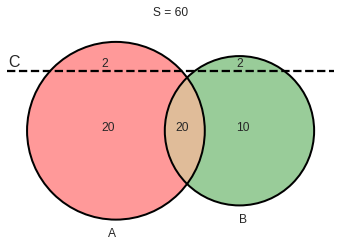

In [ ]:
fn_venn_conditional_independence()

Let set C be all elements above line C.    
As can be seen A ∩ C = 2 and B ∩ C = 2.  

Now:      
P(B) = 32/60 = 0.5333      
P(B|A) = 20/42 = 0.4762     

But given the condition that only elemnts not belonging to C are considered:    
P(B) = 30/60 = 1/2       
P(B|A) = 20/40 = 1/2

Similarly:    
P(A) = 40/60 = 2/3     
P(A|B) = 20/30 = 2/3

These kind of events are called __conditionally independent__ events.   

Conditional probability is possible if there are some conditions,    
which if applied,    
changes the proportions of A & B such that:    

len(A∩B) = (len(A) * len(B)) / len(S)  

Note that conditional independence is represented as:   
P(A | B,C) = P(A)    
Where C represents the condition that creates independence. 

Are there any other forms of conditional probabilities?   
Yes there is one other kind - __Sequential Conditional Probability__.  

## WHAT ARE SEQUENTIAL CONDITIONAL PROBABILITIES?
Consider the 2 red - 1 blue, balls in bag experiment.  
Say that we draw a ball from the bag and it turns out to be a red ball.  
What is the probability that the next ball picked will be blue?   

Since the first ball is not put back into the bag,   
the sample space of the experiment is reduced     
and hence the probabilities also change.  

So P(Blue) = 1/3 and P(Blue|Red) = 1/2   

We will explore Sequential experiments in some more depth further along the lecture.




## Let us summarize what we have understood so far:
- Conditional Probability
- Independent and dependent events.
- Parallel experiments are independent of each other.
- Disjoint sets are not independent.
- Non disjoint sets can be independent or dependent depending on:
    - If len(A∩B) = (len(A) * len(B)) / len(S)  
- Non disjoint sets can be conditionally independent.
    - P(A | B,C) = P(A)
- Multiplication rule for finding set intersections:       
ie: Probabillity of Outcomes that satify the conditions of both - events A & B.  
    - P(A∩B) = P(B) P(A|B) = P(A) P(B|A)
- Sequential experiments have Conditional Probabilities. 

# SECTION 5: 30 mins

In the previous section we discussed about probabilities for intersection of sets,    
but what about probabilities for set unions?

## WHAT IS THE PROBABILITY FOR A ∪ B?

Consider the venn diagram shown below:


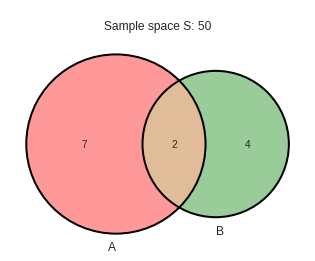

In [ ]:
fn_venn_A_B_non_disjoint()

The union of 2 sets mean that the two sets are merged into one set.  
So the probability of an even that belongs to A∪B is: (7+2+4)/50 = 13/50  
ie: P(A∪B) = total number of __unique elements__ when sets A & B are combined / size of sample space.  

Total number of unique elements when sets A & B are combined  = len(A) + len(B) - len(A∩B)   
Hence P(A∪B) = (len(A) + len(B) - len(A∩B)) / len(S)  
ie: P(A∪B) = len(A)/len(S) + len(B)/len(S) - len(A∩B)/len(S)

&nbsp;

ie: __P(A∪B) = P(A) + P(B) - P(A∩B)__ 

&nbsp;

This is called the __ADDITION RULE__ of Probability.  
Note that in the above equation:
- P(A∩B) will be  = 0 for disjoint sets.
- P(A∩B) will be > 0 for non disjoint sets.
- P(A∩B) will be = P(A) P(B|A) = P(B) P(A|B) if A & B are dependent events
- P(A∩B) will be = P(A) P(B) if A & B are independent events

In the discussions had till now we have explained the basics of probability theory    
using variations of the bag of balls experiment.    
This helped us get a good intuitive understanding of the different types of probabilties        
and the respective calculations involved.   
Now let us formally explore the laws/axioms of probabilty.  



## AXIOMS OF PROBABILITY:
There are just __3 axioms of probabity__, they are:
1. Non Negativity: P(any_event) >= 0.    

- This is another way of saying that the concept of negative probability does not exist.




2. Normalization: P(S) = 1.  

- This is another way of saying that the probability that an event is part of the sample space is  always 1.



3. Additive law:  
If A ∩ B = {∅},&nbsp; then P(A ∪ B) = P(A) + P(B)  
Where:  
- {∅} signifies a Null or Empty set. ie: A & B are disjoint

Note that:
- (A ∪ B) is synonymous with (A or B)
- (A ∩ B) is synonymous with (A & B)  


## IMPLICATIONS OF THE PROBABILITY AXIOMS:
The probability axioms are the basic rules of probability theory.   
As was seen, they are suprising few.   
But they imply some interesting and sometimes obvious properties    
which we shall now discuss.  

Given an outcome set A:
1. P(A) <= 1
2. P(∅) = 0
- ie: Probability values are always between 0 & 1. 
- P(1) signifies certainity of an event happening 
- P(0) signifies certainity of an event not happening.
- P(0.5) signifies complete uncertainity about the event's occurance.    

3. P(A) + P($A^C$) = 1   
where $A^C$ refers to the compliment of set A. It is the set of all outcomes in S that does not belong to A.

4. Given that:  
A1, A2, A3 ....A_n  are n disjoint sets where   
each of them represents outcomes      
that satisfy different event conditions    
in the same sample space S, then:  
 
- P(A1 ∪ A2 ∪ A3 ... ∪ An) = P(A1) + P(A2) + P(A3) ... + P(An)   
(This is the generalization of the 3rd axiom).

5. Give outcome sets A & B belonging to the same sample space S:   
If A is a subset of B (ie:A ⊆ B), then P(A) <= P(B)

6. Give outcome sets A & B belonging to the same sample space S and which are mutually non exclusive   
(ie: A ∩ B != {∅}),  
then:   
P(A ∪ B) = P(A) + P(B) - P(A ∩ B)   
This is the Addition law in case of disjoint sets.   
7. THE LAW OF TOTAL PROBABILITY:    
Consider the venn diagram shown below.








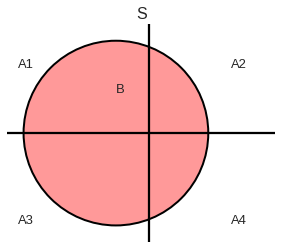

In [ ]:
fn_venn_law_total_proba()

Sets A1, A2, A3 & A4 are disjoint sets such that A1 ∪ A2 ∪ A3 ∪ A4 = S.     
In other words the disjoint sets A1, A2, A3 & A4 together form the sample space S.  
Now consider the set B which is formed out of intersections with A1, A2, A3 & A4 as shown above.  

&nbsp;

Using the additive axiom we have:  
P(B) = P(B ∩ A1) + P(B ∩ A2) + P(B ∩ A3) + P(B ∩ A4)  
- event B is union of 4 disjoint sets.

&nbsp;

Using the multiplication rule for intersection probability we have:

&nbsp;


P(B) = P(A1) P(B|A1) + P(A2) P(B|A2) + P(A3) P(B|A3) + P(A4) P(B|A4)  

This eqn can now be generalized as:

P(B) = Σ P(Ai) P(B|Ai) --- for all i.   
This is the Law of Total Probability

&nbsp;

Now since  A1 ∪ A2 ∪ A3 ∪ A4 = S, we know that P(A1) + P(A2) + P(A3) + P(A4) = 1      
ie: Σ P(Ai) for all i = 1.    

Thus in essense the Law of total probabilities states that:   
- The P(B) is the __weighted average__ of    
the conditional probabilities of B   
wrt to the disjoint sets    
whose union forms the sample space, ie: A1, A2, .. An.



&nbsp;

This can be understood using the following example:  
Consider the bag of balls experiment where the bag contains 50 balls numbered from 1 to 50.  
let:  
A1 = set of all balls having even numbers.    
A2 = set of all balls having odd numbers.   
B = set of all balls having numbers less than 20.

Now A & B are disjoint and together represent the entire sample space.  
Set C is non-disjoint wrt sets A & B.   

Now as per Law of total Probabilty   
P(B) = P(A1) P(B|A1) + P(A2) P(B|A2)

This can be seen in the code below.



In [ ]:
S = set(range(1, 51))

A1 = {i for i in S if i%2 == 0}
A2 = {i for i in S if i%2 != 0}
B = {i for i in S if i < 20}

P_A1, P_A2, P_B = len(A1)/len(S), len(A2)/len(S), len(B)/len(S)
P_B_given_A1 = len(B & A1)/len(A1)
P_B_given_A2 = len(B & A2)/len(A2)

P_B == (P_A1 * P_B_given_A1) + (P_A2 * P_B_given_A2)

True

Most of the axioms and their implications have actually been discussed   
in the previous sections without mentioning them explicitly.  

Some of them are so obvious,   
that we understand them without need for an explanation

## Let us summarize what we have understood so far:
- Set compliment
- Addition Law: P(A ∪ B) = P(A) + P(B) - P(A ∩ B) 
- Total probability law: 
    - P(B) = Σ P(Ai) P(B|Ai) --- for all i.
 


# SECTION 6: 15 mins
Let us now step back and look at what we have discussed from a broader perspective.

- What kinds of Sample spaces exist?
- What is the simplest way to classify the different kinds of experiments?
- What are the different formulae we used till now? 



## WHAT ARE THE DIFFERENT KINDS OF SAMPLE SPACES?
In general, Sample spaces can be:
- Discrete
- Continuous



## WHAT ARE DISCRETE SAMPLE SPACES?
Discrete sample spaces contain a finite set of clearly distinctive countable outcomes.  
Examples:
- the sample space of the previous balls in a bag experiment {R, B}.
- the sample space of a coin toss experiment {H, T}.
- The sample space of a lottery draw experiment {alphanumeric values}.  

ie: The outcomes consist of integers or categories.



&nbsp;


## WHAT ARE CONTINUOUS SAMPLE SPACES?
Continuous sample spaces contain non discrete outcomes.  
ie: The outcomes consist of real numbers. 

Consider the collection of all distances covered by the long jump participants of a particular school.   

The sample space could be a continuous range of values between  5 feet and 15 feet.      

In this lecture we have/will focus only discrete sample spaces.







## WHAT ARE THE DIFFERENT KINDS OF EXPERIMENTS?
When we examine/recall the types of experiments we have encountered till now,   
We can classify them as shown in the image below:

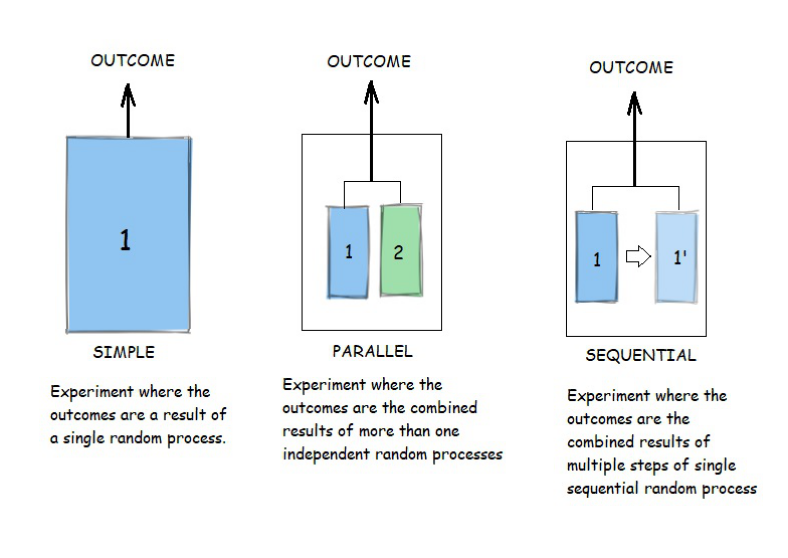

In [ ]:
img_path = data_path + 'types_of_experiments.jpg'

fn_load_img(img_path, figsize = (19, 10))

Let us now, view each of the 3 types shown above     
in terms of a bag of balls experiment,   
where any bag considered will contain   
6 red balls and 4 blue balls. 

Note that:   
- __Generally experiments with discrete sample spaces can be reduced to some form of the bag of balls experiment..__ 
- This can be quite an useful tool for analysing random experiments


## SIMPLE EXPERIMENT:
This is the basic form an experiment, where   
the outcome is the result of randomly drawing one ball from the bag.   
The sample space of such an experiment would be:   
{R, B}


## PARALLEL EXPERIMENT:
Here the experiment consists 2 mutually independent random sub processes.       
ie: There are 2 bags, where an outcome is the result of simultaneuosly drawing one ball from each bag.  

Assuming both bags are identical, the sample space of such an experiment would be:   
{(R, R), (R, B), (B, B), (B, R)}



## SEQUENTIAL EXPERIMENT:
Here the experiment consists 1 sequential random process consisting of 2 or more steps. 

In the diagram above, A sequential process with 2 steps is shown.   
Both the steps consists of randomly drawing a ball from the bag, but perfomed without replacement.   

ie: The 1st ball drawn is not put back into the bag before drawing the 2nd ball.  
    
Hence the first step results in the modification (reduction) of the sample space, expressed in the  diagram as 1 transforming to 1'.

The sample of such an experiment would be:    
{(R, R), (R, B), (B, B), (B, R)} -- same as the parallel experiment.

__Most experiments are one of the above types or a some combination of the above types.__

## WHAT ARE THE DIFFERENT FORMULAE USED TILL NOW?
- Emphirical P(event) = n_event_occurances/n_repititions
- Theoretical P(event) = based on prior knowledge of the probabilty distribution of the experiment.
- Multipication rule: P(A∩B) = P(A) P(B)/A = P(B) P(A|B)
- Addition rule: P(A∪B) = P(A) + P(B) - P(A∩B)
- Total probability law: P(E) = P(A)P(E|A) + P(B)P(E|B) + P(C)P(E|C) + P(D)P(E|D)
    - If A, B, C & D are disjoint and collectively compose the sample space S.
    - If E is some subset of S

# SECTION 7: 45 mins

In the previous SECTIONS we discussed probabilies wrt to event __SETS__ of the sample space.

Now we will discuss probabilties with respect to __RANDOM VARIABLES__.

##  WHAT ARE RANDOM VARIABLES?
Random variables are similar to event sets with some subtle differences.   
Consider a bag of balls experiment where the bag contains 20 balls numbered 1 to 20:
- An event set would be the set of outcomes that satify some event condition.
- For example:
    - Set of all outomes that are div 2
    - Set of all outcomes that are divisible by 3
    - Set of all outcomes that are divisible by both 2 & 3
    - Set of outcomes that are divisibale by 2 or 3.  

Now every outcome in the sample space,  
could be assigned a "state" based on the event sets mentioned above.
- For example:
    - State_1: Outcome is divisible by both 2 & 3.
    - State_2: Outcome is divisble only by 2
    - State_3: Outcome is divisble only by 3
    - State_4: Outcome is not divisible by both 2 & 3.

Let us present the above states using a table.


In [ ]:
observations = []
for i in range(1, 21):
    if i%2 == 0 and i%3 == 0:
        div_2_3 = 'div_both'
    elif i%2 == 0:
        div_2_3 = 'div_two'
    elif i%3 == 0:
        div_2_3 = 'div_three'
    else:
        div_2_3 = 'not_div_both'
    observations.append([i, div_2_3])

df1 = pd.DataFrame(np.array(observations))
df1.columns = ['outcome', 'div_2_3']

df1.head(7)

,outcome,div_2_3
0,1,not_div_both
1,2,div_two
2,3,div_three
3,4,div_two
4,5,not_div_both
5,6,div_both
6,7,not_div_both


Note that values in column "div_2_3" has meaning   
only when considered with    
the corresponding outcome being examined.  
ie:  Outcomes being numbers from 1 to 20.   

The column "div_2_3" in the table above is considered a Random Variable.  

Random Variables are essentially observations made about some property/atttribute of the outcomes.

In this case, the attribute being observed is regarding the divisibility of the outcomes wrt 2 & 3.

ie: __Random Variables give information about the "STATE" of an outcome wrt to a particular attribute.__      

Here the states of the outcomes wrt attribute "div_2_3" are:  
states: {div_both, not_div_both, div_3, div_2} 


We can find probabilites for each state of the random variable using the same principles we have learnt.

This is expressed in example shown below.

In [ ]:
n_outomes_div_both = len(df1[df1.div_2_3 == 'div_both'])
n_outcomes = len(df1)
P_div_both = n_outomes_div_both/n_outcomes

P_div_both

0.15

Can an experiment have more than one random variable associated with it?    
Yes they can.  
In cases such as these, we come across the concepts of JOINT and CONDITIONAL PROBABILTY.

## WHAT ARE JOINT PROBABILTIES?
Let us define another random variable called "prime" for the same experiment.    
We shall define "prime" as follows: 
- It should reflect the state of the outcome wrt whether it is a prime number or not.

In [ ]:
from sympy import isprime
observations = []
for i in range(1, 21):

    prime = 'yes' if isprime(i) else 'no'
    observations.append([i, prime])

df2 = pd.DataFrame(np.array(observations))
df2.columns = ['outcome', 'prime']

df2.head()

,outcome,prime
0,1,no
1,2,yes
2,3,yes
3,4,no
4,5,yes


Let us now summarize the outcomes wrt to these 2 random variables:

In [ ]:
df3 = df1.assign(prime = df2.prime)
df3.head()

,outcome,div_2_3,prime
0,1,not_div_both,no
1,2,div_two,yes
2,3,div_three,yes
3,4,div_two,no
4,5,not_div_both,yes


Given the above table,   
We could ask questions like:
- What would be the probability of a  number that is prime and also divisible by 2?
- What is the probability that a number is not divisble by both 2 & 3 and also a prime number?

ie:   
- P(prime ∩ div_2)
- P(not_div_both ∩ prime)

__Joint distributions are basically intersection probabilties between 2 or more random variables__.  

One can get a overview  
of the join probabilities   
of an experiment's Random Variables,   
by creating __CONTINGENCY TABLES__.

## WHAT ARE CONTINGENCY TABLES?
A contingency table summarizes the joint probabilities between two or more random variables.     


It can be obtained by finding out the proportions   
of the various "state combinations" that exist   
across 2 or more random variables.  


In our case there are 8 possible "state combinations":

In [ ]:
fn_joint_combinations()

,div_2_3,prime
0,div_both,yes
1,div_both,no
2,not_div_both,yes
3,not_div_both,no
4,div_3,yes
5,div_3,no
6,div_2,yes
7,div_2,no


The counts of the various "state combinations" can be presented as shown below: 

In [ ]:
rows = df3.div_2_3
cols = df3.prime
counts = pd.crosstab(rows, cols)
counts

prime,no,yes
div_2_3,,
div_both,3,0
div_three,2,1
div_two,6,1
not_div_both,1,6


Each cell in the table above represents counts of joint outcomes.   
The joint probabilties for each of the combinations   
can now be got by   
dividing each value in the table   
by the size of the sample space.     

The table thus obtained is the CONTINGENCY TABLE wrt the 2 random variables div_2_3 and prime.   

In [ ]:
joint_probabilties = counts/len(df3)
joint_probabilties

prime,no,yes
div_2_3,,
div_both,0.15,0.00
div_three,0.10,0.05
div_two,0.30,0.05
not_div_both,0.05,0.30


 
Joint probabilties can also be directly computed as shown below:

In [ ]:
not_div_both_and_prime = (df3.div_2_3 == 'not_div_both') & (df3.prime == 'yes')

len(df3[not_div_both_and_prime])/len(df3)

0.3

In [ ]:
div_three_and_not_prime = (df3.div_2_3 == 'div_three') & (df3.prime == 'no')

len(df3[div_three_and_not_prime])/len(df3)

0.1

Are conditional probabilities possible between random variables?    
Yes they are. Such probabilities are called MARGINAL PROBABILITIES.

## WHAT ARE MARGINAL PROBABILTITIES?
Let us reconsider the random variables just discussed previously:


In [ ]:
df3.head()

,outcome,div_2_3,prime
0,1,not_div_both,no
1,2,div_two,yes
2,3,div_three,yes
3,4,div_two,no
4,5,not_div_both,yes


What is the probabilty that an outcome is prime given that it is not divisible by both 2 & 3?   
ie: We want: P(not_div_both | prime)   
ie: __Marginal probabilties are basically conditional probabilities between 2 or more Random Variables.__  

This can easily computed using our understanding of intersections.
This is shown below. 

It can also be computed using our understanding of intersections    
ie: P(A|B) = P(A∩B)/P(B).

Wrt the our example it would thus be:



In [ ]:
cond_1 = df3.div_2_3 == 'not_div_both'
cond_2 = df3.prime == 'yes'
intersection = cond_1 & cond_2

size_intersection = len(df3[intersection])
prime_count = len(df3[df3.prime == 'yes'])

P_not_div_both_given_prime = size_intersection/prime_count
P_not_div_both_given_prime

0.75

The same can also be found by first isolating all prime number outcomes and  
then finding what proportion of those are not divisibe by 2 and 3.   
This done as shown below.



In [ ]:
condition = (df3.prime == 'yes')
prime_outcomes = df3[condition]

prime_outcomes

,outcome,div_2_3,prime
1,2,div_two,yes
2,3,div_three,yes
4,5,not_div_both,yes
6,7,not_div_both,yes
10,11,not_div_both,yes
12,13,not_div_both,yes
16,17,not_div_both,yes
18,19,not_div_both,yes


In [ ]:
condition = (prime_outcomes.div_2_3 == 'not_div_both')
prime_not_div_both = prime_outcomes[condition]
prime_not_div_both

,outcome,div_2_3,prime
4,5,not_div_both,yes
6,7,not_div_both,yes
10,11,not_div_both,yes
12,13,not_div_both,yes
16,17,not_div_both,yes
18,19,not_div_both,yes


In [ ]:
P_not_div_both_given_prime = len(prime_not_div_both)/len(prime_outcomes)
P_not_div_both_given_prime

0.75

## Let us summarize what we have understood so far:
- Sets Vs Random Variables
- Joint Probabilities - Intersectional probabilities between 2 or more Random Variables
- Marginal Probabilties - Conditional Probabilities between 2 or more random Variables

# SECTION 8: 30 mins




In the discussions had till now we have only used the Frequentist perspective.
## Is there any other useful probabilistic perpective?  
Yes there is... Its called the __BAYESIAN PERSPECTIVE__  and its based on the __BAYES RULE__.



## WHAT IS THE BAYES RULE?
The Bayes rule is derived from the multiplication rule.    
We know that:  P(A∩B) = P(A) * P(B|A) = P(B) * P(A|B).  
Thus we can say:  
- P(A|B) = P(B|A) * P(A)/P(B)


This rearrangement of the formula   
highlights the relationship between 
the conditonal probabilties of an experiment.     
ie: relationship between P(A|B) & P(B|A)



&nbsp; 

We shall understand its significamce by using a simple example.  

Imagine that:
1. There are 2 scenarios that could lead to the same set of outcomes. 
2. But only one of the scenarios can play out at any given moment.
3. Now given that a particular outcome has occured,  
Which of the scenarios can it be attributed to? 

&nbsp;

Let us use the bag of balls example again to make things more clear.  

Consider that the experiment consists of drawing a ball randomly from any one of 2 bags.  
Bag_1 has 3 red and 2 blue balls, whereas bag_2 has 2 red and 2 blue balls.  
ie:
- probability distribution bag_1: {R: 3/5, B:2/5}
- probability distribution bag_1: {R: 2/4, B:2/4}    

Given that a blue ball was drawn, what is the probabilty that it belonged to bag 2?  
ie: What is P(bag_2 | blue)?

__In this case bags 1 & 2 represent "scenarios" and colors red and blue represent outcomes.__

Using the Bayes rule we have:  
P(bag_2 | blue) = P(blue | bag_2) * P(bag_2) / P(blue)   
where:  
P(blue) = P(bag_1) * P(blue|bag_1) + P(bag_2) * P(blue|bag_2) 
- by law of total probabilty.   



The venn diagram for such an experiment would be as shown.




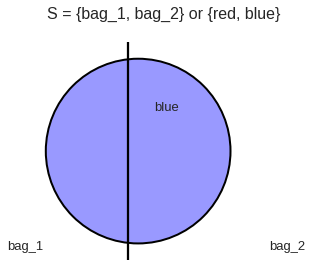

In [ ]:
fn_venn_bayes()

This venn diagram is unique/different because:
1. The sample space of the experiment is {bag_1, bag_2} when looked at from the perspective of:
    - "which bag was the ball drawn from?" or "which __scenario__ occurred ?"
2.  The sample space of the experiment is {red, blue} when looked at from the perspective of:
    - "which colored ball was drawn?" or "which __outcome__ occured?"
3. Sample space is disjoint from the {bag_1, bag_2} perspective
4. Sample space is non-disjoint from the {red, blue} perspective
5. Law of total probability can be applied to obtain individual probabilites of blue & red. ie: P(Blue) and P(Red).



Bayes rule relates the probabilities of:
- One sample space perspective with another via their conditionalities.
- ie: relationship between P(bag_2 | blue ) and P(blue | bag_2) and all such combinations.

Hence, using __total probabilty law__ we have :

P(blue) = P(bag_1) P(blue|bag_1) + P(bag_2) P(blue|bag_2)  

P(blue) = (1/2 * 2/5) + (1/2 * 2/4)

In [ ]:
P_blue = (1/2 * 2/5) + (1/2 * 2/4)
P_blue

0.45

Using __Bayes rule__ we have:  
P(bag_2 | blue) = P(blue | bag_2) * P(bag_2) / P(blue)   
P(bag_2 | blue) = (2/4) * (1/2) / P_blue  

In [ ]:
P_bag_2_given_blue = (2/4) * (1/2) / P_blue
P_bag_2_given_blue

0.5555555555555556

Note that: P(blue) + P(red) should be = 1    
- Where: P(red) =  P(bag_1) P(red|bag_1) + P(bag_2) P(red|bag_2) - - - (Law of Total Probability) 
 
Hence:

In [ ]:
P_red =  (1/2 * 3/5) + (1/2 * 2/4)

P_blue + P_red

1.0

Note that the bayes rule can further be interpreted as shown below:

P(scenario | outcome) = P(outcome | scenario) * P(scenario) / P(outcome)   

In the formula above:

- P(scenario) is called the __prior__ probability.    
ie:  Probability of the scenario under consideration, regardless of outcome observed.
- P(outcome|scenario) is called the __likelihood__.  
ie: Probability of observed outcome, given that the scenario under consideration occurs. 
- P(outcome)  is called the __evidence__ or __marginal__.  
ie: Total Probability of the observed outcome.  
ie: Probability of the observed outcome considered under all scenarios.
- P(scenario | outcome) is called the __posterior__ probability.    
ie: Probability of the scenario being considered, given the observed outcome.


#  EXERCISES:

## Problem_1:   
Given that four dice are thrown, the probability that only one of them shows a 6 is approximately:

&nbsp; 

Choices:   
a. 0.5172   
b. 0.3858   
c. 0.6647   
d. 0.2784   


Soln:  

Outcome of each dice is independent of the others.

P(6xxx) = P(6 ∩ not_6 ∩ not_6 ∩ not_6) = (1/6) * (5/6) * (5/6) * (5/6) = 0.0964   
- Multiplication law for intersection of independent events.   

P(6xxx or x6xx or xx6x or xxx6) = 4 * P(6xxx)  = 0.3858.
- Additive law for union of disjoint sets.

## Problem_2:  
Tom belongs to a group of astronauts and engineers.   
The ratio of astronauts to engineers is 3:10.    
It is known that 60% of astronauts and 15% of engineers have taken a basic course in physics.     
Tom has taken a basic course in physics, what is the probability of him being an astronaut?

&nbsp;

Choices:    
A.   0.42  
B.   0.33   
C.   0.62   
D.   0.54


Soln:   


P(astronaut) = 3/13 = 0.231   
P(engineer) = 10/13 = 0.7692

P(physics | astronaut) = 0.6   
P(physics | engineer) = 0.15

P(astronaut | physics) = ?


P(astronaut | physics) = P(physics | astronaut) * P(astronaut) / P(physics)  
- Bayes rule.   

P(physics) = P(astronaut) * P(physics | astronaut)  +  P(engineer) * P(physics | engineer)  
- Law of Total Probability

P(physics) = (0.231 * 0.6)  +  (0.7692 *  0.15) = 0.254

Substitutiong in bayes rule we have:  
P(astronaut | physics) = 0.6 * 0.231 / 0.254 = 0.54.


## Problem_3:  
Three rock climbers attempt to climb a particular cliff. 
The probability of success based on past experience for climbers 1, 2 & 3 are: 72.5%, 57.14% and 33.66% respectively. 
 
What is the probability that, of the three climbers, at least two will be successful?

&nbsp;

Choices:   
a. 0.6093   
b. 0.7234   
c. 0.5717   
d. 0.2926   


Solution:   
Let P1, P2, P3 denote the probabilities that first, second and third rock climbers are successful. 

Then:    
P1 = 0.725,   
therefore: P1_not = 1 - 0.725 = 0.275                             
P2 = 0.5714,   
therefore: P2_not = 1 - 0.5714 = 0.4286                         
P3 = 0.3366,   
therefore: P3_not = 1 - 0.3366 = 0.6634

Probability that, of the three climbers, at least two will be successful will be:  
P = (P1 * P2 * P3_not) + (P1 * P2_not * P3)  + (P1_not * P2 * P3) + (P1 * P2 * P3)  
- By Additive law   


ie: P = (0.725 * 0.5714 * 0.6634) + (0.725 * 0.4286 * 0.3366) 
      + (0.275 * 0.5714 * 0.3366) + (0.725 * 0.5714 * 0.3366)    
ie: P = 0.2748 + 0.1045 + 0.0529 + 0.1394 = 0.5717


## Problem_4:  

The nut manufacturing machines A, B, C & D are used to manufacture all the nuts at a nut manufacturing factory.    
It is known that machines A, B & C produce 20%, 35% and 40% of the total output.     
Past experience shows that 5%, 4%, 3% and 2% of the nuts produced by machines by A, B, C & D respectively are defective.     
If we randomly selected a nut and it was found to be defective, then arrange the following probabilities in descending order: 

1. Probability that it was manufactured using machine A   
2. Probability that it was manufactured using machine B   
3. Probability that it was manufactured using machine C   
4. Probability that it was manufactured using machine D   



Choices:     
a. 3, 4, 2, 1    
b. 2, 3, 4, 1   
c. 1, 3, 4, 1    
d. 2, 3, 1, 4    


Solution:   

Let A, B, C & D be the events that the nuts were manufactured by machines A, B, C and D respectively.    
  Therefore: 
P(A) = 0.2  
P(B) = 0.35
P(C) = 0.4 
P(D) = 0.05 --- 1- (P(A) + P(B) + P(C))

Let Z be the event that nuts are defective.   
Therefore:    

P(Z|A) = 0.05   
P(Z|B) = 0.04   
P(Z|C) = 0.03   
P(Z|D) = 0.02   

Now using Law of total probability:  
P(Z) =  P(Z│A) * P(A) + 
P(Z│B) * P(B) + 
P(Z│C) * P(C) + 
P(Z│D) * P(D)

ie: P(Z) = 0.05 * 0.2 + 0.04 * 0.35 + 0.03 * 0.4 + 0.02 * 0.05 = 0.037

By using Bayes Theorem, the probability that the nut was produced by machine A , given that it is defective is:    
P(A│Z) = (P(Z│A) * P(A)) / P(Z) = 0.05 * 0.2 / 0.037 = 0.27

Similarly:    
P(B│Z) = (P(Z│B) * P(B)) / P(Z) =  0.04 * 0.35 / 0.037  = 0.378   
P(C│Z) = (P(Z│C) * P(C)) / P(Z) =  0.03 * 0.40 / 0.037   = 0.324   
P(D│Z) = (P(Z│D) * P(D)) / P(Z) = 0.02 * 0.05 / 0.037  = 0.027    


## Problem_5:       
In a game of cricket, out of the total sixes in an innings, Sachin scored 20% of them, Sehwag scored 55% of them and the remaining 25% were scored by Dravid. 

The probability of showing  sixes scored by Sachin, Sehwag and Dravid in the video highlights after the match are 0.25, 0.12  and 0.18 respectively. 
A six is selected at random from all sixes and shown in the video highlights.
What is the probability that it was hit by Dravid?

a. 0.17  
b. 0.30   
c. 0.22   
d. 0.28


Solution:    
P(A|B) = P(B|A) x P(A) / P(B)

Events: A, B, C = six by sachin, six by sehwag, six by dravid      
P(six by sachin) = P(A) = 0.2   
P(six by sehwag) = P(B) = 0.55    
P(six by dravid) = P(C) = 0.25   

P(highlighted | sachin’s six) = P(H|A) = 0.25   
p(highlighted | sehwag’s six) = P(H|B) = 0.12   
p(highlighted | dravid’s six) = P(H|C) = 0.18   

P(six by dravid | highlighted) =  P(C|H) = P(H|C) P(C)/P(H)   

P(C|H) = 0.18*0.25/P(H)

P(H) = P(H | A) * P(A)  +  P(H | B)) * P(B)  +  P(H | C)) * P(C)   

P(H) = 0.25 * 0.20 + 0.12 * 0.55 + 0.18 * 0.25 = 0.161

P(C|H) =  0.18 * 0.25 / 0.161 = 0.279


## Problem_6 (Monty hall problem):     

The Monty Hall Problem is based on a game show called Let’s Make a Deal.    
Here’s how the game works:  

Imagine you are a contestant on a game show.    
The host (Monty) shows you three doors, labelled 1, 2, and 3.   

He tells you that behind one of the doors there is a car and behind the other 2 doors there is a goat.   

The object of the game is to guess which door has the car. If you guess right, you get to keep the car.    

Lets say you pick Door 1.   
Before opening the door you chose, Monty opens Door 3 and reveals a goat.    

Then Monty offers you the option to stick with your original choice or switch to the remaining unopened door.

To maximize your chance of winning the car, should you: 
1. Stick with Door 1 ? 
2. Switch to Door 2 ?
3. It does not matter..

Soln:   
To answer this question, we have to make some assumptions about the behavior of
the host:
1. Monty always opens a door and offers you the option to switch.
2. He never opens the door you picked or the door with the car.
3. If you choose the door with the car, he chooses one of the other doors at random.  


&nbsp; 

P(car_1), P(car_2), P(car_3) = 1/3 - - - Probability of car being behind doors 1, 2 & 3.       
P(monty_3 | car_1) = 1/2   - - - ie: If car behind door 1, monty picks door 2 or 3 randomly.      
P(monty_3 | car_2) = 1   - - - - ie: If car behind door 2, monty picks door 3.       
P(monty_3 | car_3) = 0   - - - - ie: If car behind door 3, monty will not pick door 3.         

 
&nbsp; 

We want P(car_2 | monty_3) and P(car_1 | monty_3)     

P(car_2 | monty_3) = P(monty_3 | car_2) * P(car_2) / P(monty_3)   

P(car_1 | monty_3) = P(monty_3 | car_1) * P(car_1) / P(monty_3)

&nbsp; 

Now by Law of Total Probability:    
P(monty_3) = P(car_1) * P(monty_3 | car_1) + P(car_2) * P(monty_3 | car_2) + P(car_3) * P(monty_3 | car_3) 

&nbsp; 

ie: P(monty_3) = (1/3) * (1/2) + (1/3) * (1) + (1/3) * (0) = 1/2   

&nbsp; 

Therefore:   
P(car_2 | monty_3) = (1) * (1/3) / (1/2) = 2/3 = 0.6667     
P(car_1 | monty_3) = (1/2) * (1/3) / (1/2) = 1/3 = 0.3333   

Hence switching to door_2 is a better stratergy..

## Simulating the Monty Hall problem:

In [ ]:
def fn_montyhall():

    car = np.random.choice([1,2,3])
    you = 1
    other_doors = [2,3]

    if car == you:
        monty = np.random.choice(other_doors)
    else:
        other_doors.remove(car)
        monty = other_doors[0]

    return you, car, monty

In [ ]:
samples = [fn_montyhall() for i in range(100_000)] #---- 100,000 Repititions.

samples = np.array(samples) 
cols = 'you car monty'.split()
df = pd.DataFrame(samples, columns = cols)

df.head()

,you,car,monty
0,1,1,3
1,1,3,2
2,1,2,3
3,1,1,2
4,1,1,2


Probability of car being behind door 2 given monty opened door 3 after you chose door 1:

In [ ]:
# Only cases where monty opened door 3:
df_monty_3 = df[df.monty == 3] 

# Cases where car behind door 2 given monty opened door 3:
df_car_2 = df_monty_3[df_monty_3.car == 2]

# Probability of car behind door 2 given monty opened door 3:
P_car_2 = len(df_car_2)/len(df_monty_3)
P_car_2

0.6661394622514966

We see that the Emphirical probability confirms our theortical  probability calculations.